In [123]:
import pandas as pd
import numpy as np
import seaborn as sbrn
import missingno as msno
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (InputLayer, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import Isomap
from scipy import stats

In [124]:
data = pd.read_csv('./Dataset/House_Price_Dataset.csv')

In [125]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [126]:
data = data[~data['Price'].isnull()]

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Address        27247 non-null  object 
 2   Rooms          27247 non-null  int64  
 3   Type           27247 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         27247 non-null  object 
 6   Seller         27247 non-null  object 
 7   Date           27247 non-null  object 
 8   Distance       27246 non-null  float64
 9   Postcode       27246 non-null  float64
 10  Rooms2         20806 non-null  float64
 11  Bathroom       20800 non-null  float64
 12  Car            20423 non-null  float64
 13  Landsize       17982 non-null  float64
 14  BuildingArea   10656 non-null  float64
 15  YearBuilt      12084 non-null  float64
 16  CouncilArea    27244 non-null  object 
 17  Latitude       20993 non-null  float64
 18  Longit

<AxesSubplot:>

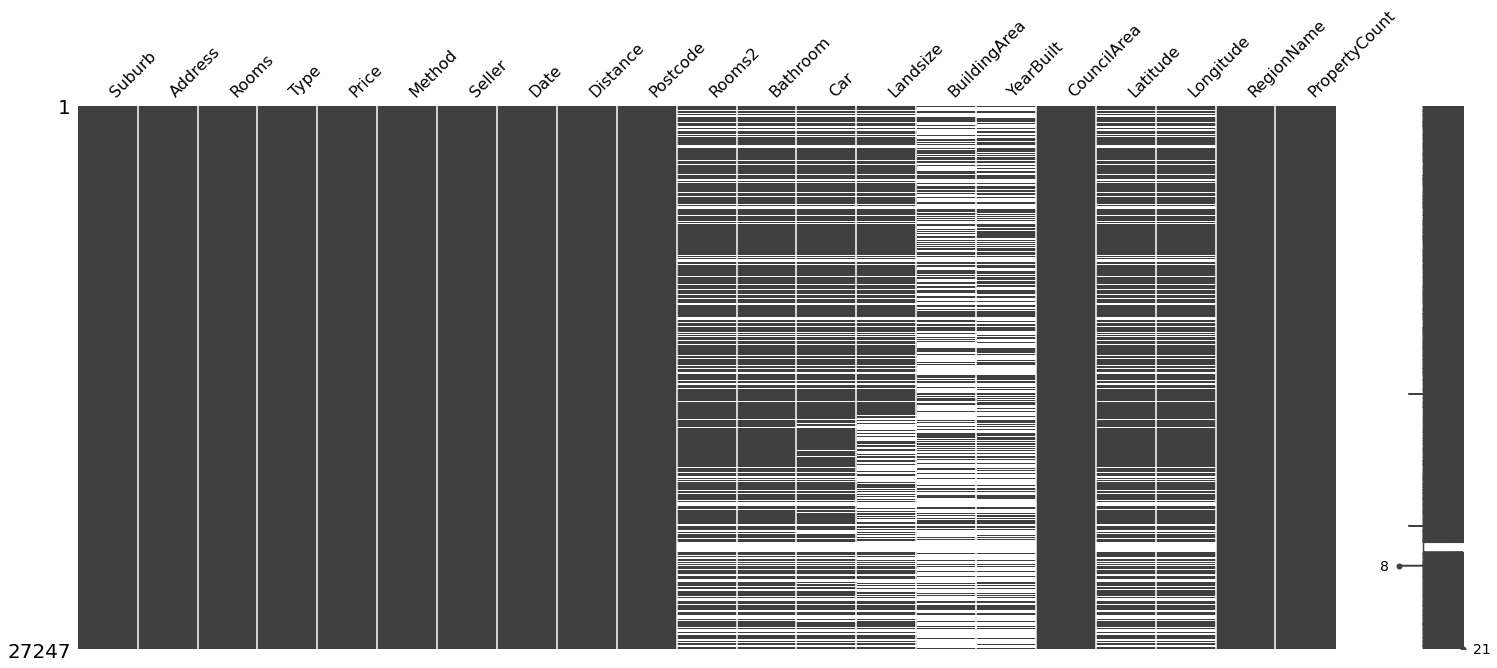

In [128]:
msno.matrix(data)

<AxesSubplot:>

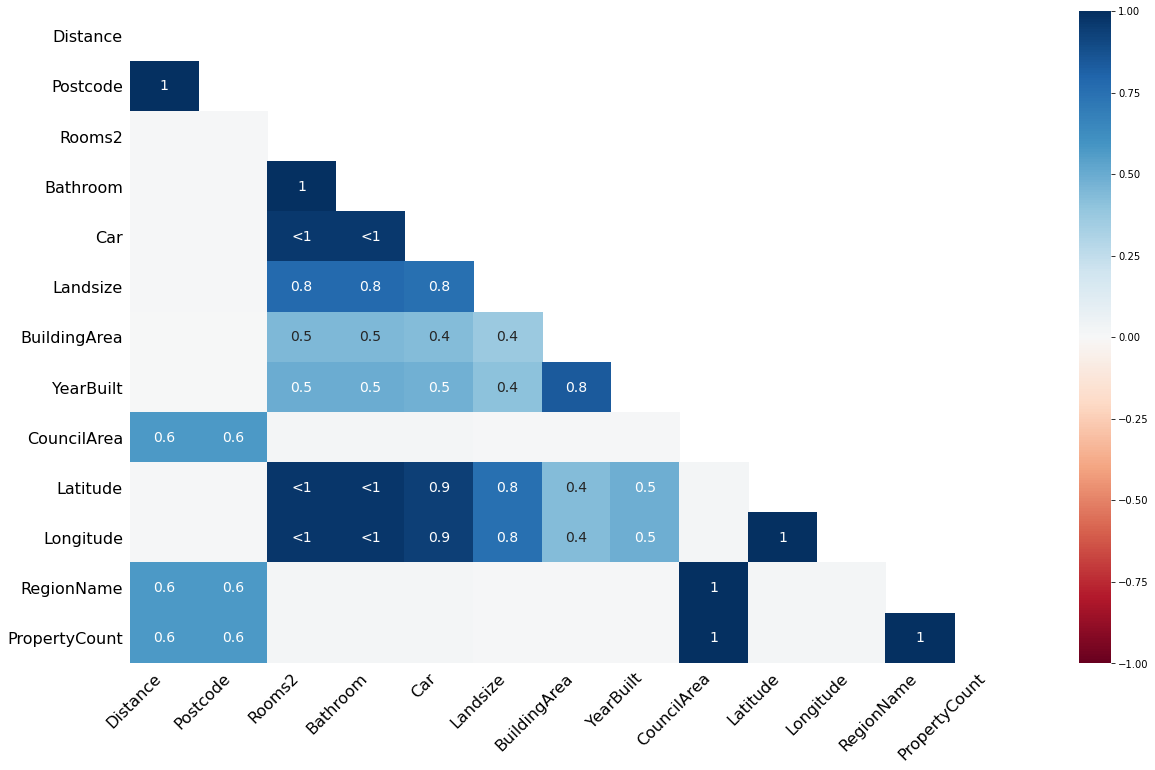

In [129]:
msno.heatmap(data)

In [130]:
data['Rooms'] = (data.apply(lambda row: (row.Rooms + row.Rooms2) / 2  if row.Rooms2 else row.Rooms, axis=1))

In [131]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,RegionName,PropertyCount
1,Abbotsford,85 Turner St,2.0,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2.0,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3.0,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3.0,h,850000.0,PI,Biggin,04/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,3.5,h,1600000.0,VB,Nelson,04/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [132]:
data = data.drop(columns=['Date', 'Rooms2', 'Address', 'Seller', 'Method'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27247 non-null  object 
 1   Rooms          20806 non-null  float64
 2   Type           27247 non-null  object 
 3   Price          27247 non-null  float64
 4   Distance       27246 non-null  float64
 5   Postcode       27246 non-null  float64
 6   Bathroom       20800 non-null  float64
 7   Car            20423 non-null  float64
 8   Landsize       17982 non-null  float64
 9   BuildingArea   10656 non-null  float64
 10  YearBuilt      12084 non-null  float64
 11  CouncilArea    27244 non-null  object 
 12  Latitude       20993 non-null  float64
 13  Longitude      20993 non-null  float64
 14  RegionName     27244 non-null  object 
 15  PropertyCount  27244 non-null  float64
dtypes: float64(12), object(4)
memory usage: 3.5+ MB


<AxesSubplot:>

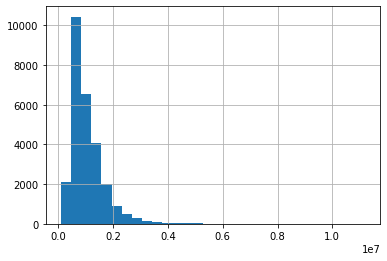

In [133]:
data['Price'].hist(bins = 30)

## Removing Outliers

In [134]:
quantile_margin = 0.01
columns = ['Price']
for column in columns:
    if data[column].dtype == 'float64':
        upper = data[column].quantile(1 - quantile_margin)
        lower = data[column].quantile(0 + quantile_margin)
        data = data[(data[column].isnull()) | ((data[column] < upper) & (data[column] > lower))]

#### _________

<AxesSubplot:>

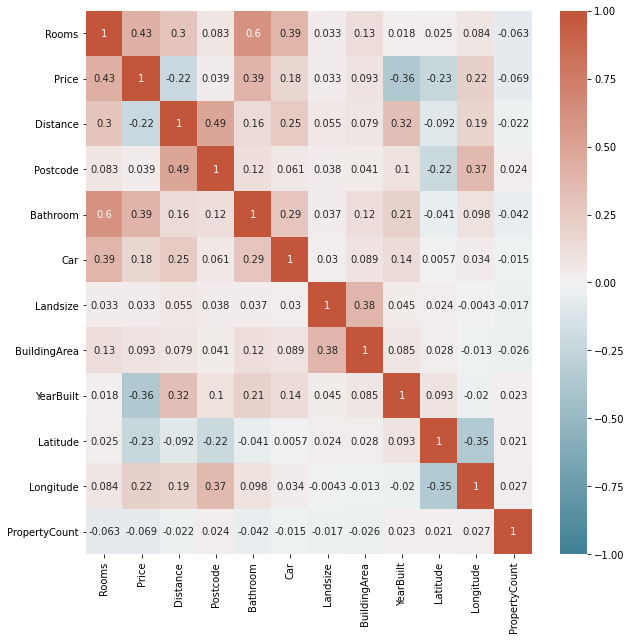

In [135]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sbrn.heatmap(corrmat, annot=True, cmap=sbrn.diverging_palette(220, 20, as_cmap=True), vmin=-1, vmax=1)

In [136]:
data = data.drop(columns=['Postcode'])

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26687 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         26687 non-null  object 
 1   Rooms          20393 non-null  float64
 2   Type           26687 non-null  object 
 3   Price          26687 non-null  float64
 4   Distance       26686 non-null  float64
 5   Bathroom       20388 non-null  float64
 6   Car            20014 non-null  float64
 7   Landsize       17615 non-null  float64
 8   BuildingArea   10429 non-null  float64
 9   YearBuilt      11818 non-null  float64
 10  CouncilArea    26684 non-null  object 
 11  Latitude       20575 non-null  float64
 12  Longitude      20575 non-null  float64
 13  RegionName     26684 non-null  object 
 14  PropertyCount  26684 non-null  float64
dtypes: float64(11), object(4)
memory usage: 3.3+ MB


In [138]:
data = data[~data['Rooms'].isnull()]
data = data[~data['Bathroom'].isnull()]
data = data[~data['Latitude'].isnull()]
data = data[~data['Longitude'].isnull()]

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20366 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         20366 non-null  object 
 1   Rooms          20366 non-null  float64
 2   Type           20366 non-null  object 
 3   Price          20366 non-null  float64
 4   Distance       20366 non-null  float64
 5   Bathroom       20366 non-null  float64
 6   Car            19992 non-null  float64
 7   Landsize       17585 non-null  float64
 8   BuildingArea   10420 non-null  float64
 9   YearBuilt      11809 non-null  float64
 10  CouncilArea    20366 non-null  object 
 11  Latitude       20366 non-null  float64
 12  Longitude      20366 non-null  float64
 13  RegionName     20366 non-null  object 
 14  PropertyCount  20366 non-null  float64
dtypes: float64(11), object(4)
memory usage: 2.5+ MB


## Hot Encoding

In [140]:
def hot_encode(category, df):
    ohe = OneHotEncoder()
    print(np.unique(df[category].astype(str)))
    category_col = ohe.fit_transform(df[category].astype(str).values.reshape(-1, 1)).toarray()
    for i in range(len(category_col[0])):
        arr = []
        for x in category_col:
            arr.append(x[i])
        df[f'{category}{i}'] = arr

In [141]:
def hot_encode_many(fields, df):
    for field in fields:
        print(field)
        hot_encode(field, df)

In [142]:
hot_encodable_fields = ['Type', 'CouncilArea']
hot_encode_many(hot_encodable_fields, data)

Type
['h' 't' 'u']
CouncilArea
['Banyule City Council' 'Bayside City Council' 'Boroondara City Council'
 'Brimbank City Council' 'Cardinia Shire Council' 'Casey City Council'
 'Darebin City Council' 'Frankston City Council' 'Glen Eira City Council'
 'Greater Dandenong City Council' 'Hobsons Bay City Council'
 'Hume City Council' 'Kingston City Council' 'Knox City Council'
 'Macedon Ranges Shire Council' 'Manningham City Council'
 'Maribyrnong City Council' 'Maroondah City Council'
 'Melbourne City Council' 'Melton City Council' 'Mitchell Shire Council'
 'Monash City Council' 'Moonee Valley City Council'
 'Moorabool Shire Council' 'Moreland City Council'
 'Nillumbik Shire Council' 'Port Phillip City Council'
 'Stonnington City Council' 'Whitehorse City Council'
 'Whittlesea City Council' 'Wyndham City Council' 'Yarra City Council'
 'Yarra Ranges Shire Council']


In [143]:
data = data.drop(columns=hot_encodable_fields+['Suburb', 'RegionName', 'BuildingArea'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20366 entries, 1 to 34856
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          20366 non-null  float64
 1   Price          20366 non-null  float64
 2   Distance       20366 non-null  float64
 3   Bathroom       20366 non-null  float64
 4   Car            19992 non-null  float64
 5   Landsize       17585 non-null  float64
 6   YearBuilt      11809 non-null  float64
 7   Latitude       20366 non-null  float64
 8   Longitude      20366 non-null  float64
 9   PropertyCount  20366 non-null  float64
 10  Type0          20366 non-null  float64
 11  Type1          20366 non-null  float64
 12  Type2          20366 non-null  float64
 13  CouncilArea0   20366 non-null  float64
 14  CouncilArea1   20366 non-null  float64
 15  CouncilArea2   20366 non-null  float64
 16  CouncilArea3   20366 non-null  float64
 17  CouncilArea4   20366 non-null  float64
 18  Counci

<AxesSubplot:>

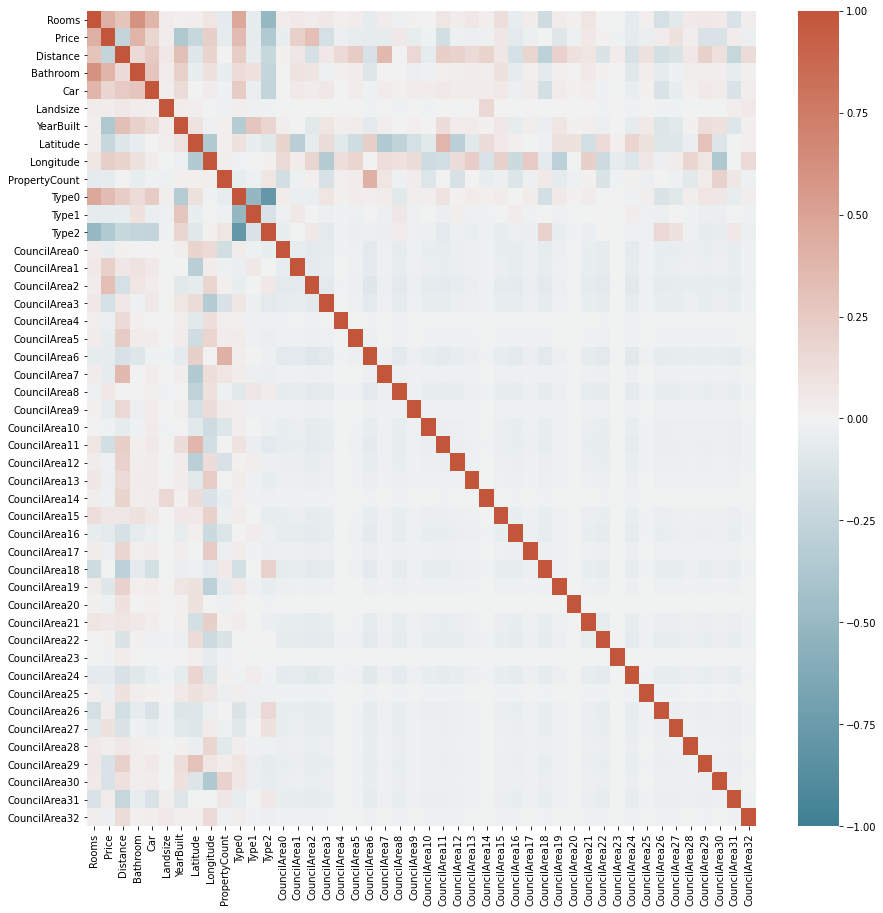

In [144]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(15, 15))
sbrn.heatmap(corrmat, cmap=sbrn.diverging_palette(220, 20, as_cmap=True), vmin=-1, vmax=1)

In [145]:
data['Landsize'] = data['Landsize'].replace(['0', 0], np.nan)

In [146]:
## get non-categorical column names

def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)

def get_quantative(column_names):
    for x in column_names:
        if not hasNumbers(x):
            yield x

In [147]:
def fill_null_with_mean(df, columns, from_df):
    if from_df is not None:
        for name in columns:
            df[name].fillna(from_df[name].mean(), inplace=True)
    else:
        for name in columns:
            df[name].fillna(df[name].mean(), inplace=True)

In [148]:
Y = data['Price']
X = data.drop(columns=['Price'])

In [149]:
quantative_columns = list(get_quantative(X.columns))

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y.to_numpy(), test_size=0.2, shuffle=False)

In [151]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
fill_null_with_mean(X_train, quantative_columns, None)

X_test = pd.DataFrame(data=X_test, columns=X.columns)
fill_null_with_mean(X_test, quantative_columns, X_train)

In [152]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x = scaler_x.fit_transform(X_train)
y = scaler_y.fit_transform(y_train.reshape(len(y_train),1))[:,0]

In [153]:
X_scaled_test = scaler_x.transform(X_test)
y_scaled_test = scaler_y.transform(y_test.reshape(len(y_test),1))[:,0]

In [154]:
print(x.shape)
n = x.shape[1]

(16292, 45)


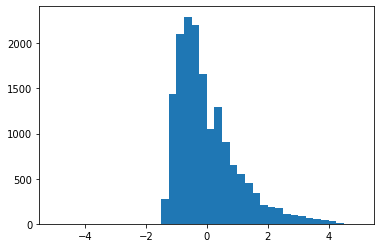

In [155]:
fig, ax = plt.subplots()
hist = ax.hist(y, bins=40, range=[-5, 5])

In [156]:
def sample_match(pred, real, open_pred):
    d = {'prediction': [x[0] for x in pred] if open_pred else pred, 'real': real}
    return pd.DataFrame(data=d)

# ANN

In [157]:
model = Sequential()
model.add(Dense(96, activation='relu', input_shape=(n,)))
model.add(Dense(96, activation='relu', kernel_regularizer='l2', kernel_initializer='he_uniform'))
model.add(Dense(48, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(48, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(16, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(8, kernel_regularizer='l2', kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='linear'))

In [158]:
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error', metrics=['mse'])

In [159]:
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=0.00005)
early_stopping = EarlyStopping(monitor="val_loss", patience=7)
history = model.fit(x, y, epochs=150, batch_size=16, validation_split=0.1, 
                  callbacks=[reduce_lr, early_stopping], verbose=1)

Epoch 1/150
917/917 [==============================] - 2s 1ms/step - loss: 2.7984 - mse: 0.4043 - val_loss: 0.8222 - val_mse: 0.2947
Epoch 2/150
917/917 [==============================] - 1s 1ms/step - loss: 0.7281 - mse: 0.2999 - val_loss: 0.5060 - val_mse: 0.2696
Epoch 3/150
917/917 [==============================] - 1s 1ms/step - loss: 0.4760 - mse: 0.2725 - val_loss: 0.4013 - val_mse: 0.2652
Epoch 4/150
917/917 [==============================] - 1s 1ms/step - loss: 0.3871 - mse: 0.2644 - val_loss: 0.3309 - val_mse: 0.2431
Epoch 5/150
917/917 [==============================] - 1s 1ms/step - loss: 0.3426 - mse: 0.2605 - val_loss: 0.3174 - val_mse: 0.2504
Epoch 6/150
917/917 [==============================] - 1s 1ms/step - loss: 0.3241 - mse: 0.2587 - val_loss: 0.3207 - val_mse: 0.2638
Epoch 7/150
917/917 [==============================] - 1s 1ms/step - loss: 0.2948 - mse: 0.2383 - val_loss: 0.2861 - val_mse: 0.2317
Epoch 8/150
917/917 [==============================] - 1s 1ms/step - 

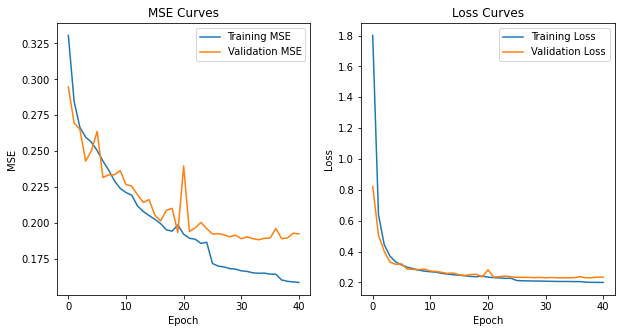

In [160]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training MSE',
           'Validation MSE'])
plt.title('MSE Curves')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [161]:
nn_results = model.predict(X_scaled_test)

In [162]:
sample_match(nn_results[:25], y_scaled_test[:25], True)

,prediction,real
0,0.906317,0.734979
1,1.526064,1.081740
2,1.531593,1.152544
3,1.044939,1.310493
4,0.093277,0.371878
5,2.087196,1.107157
6,1.583712,1.533800
7,-0.886974,-0.826354
8,-1.151862,-1.116835
9,-1.137470,-1.062370


In [163]:
r2_score(nn_results, y_scaled_test)

0.7606506768935619

In [164]:
mean_squared_error(nn_results, y_scaled_test)

0.18973705155307422

# SVM

In [1000]:
param_grid = {'C': [0.1, 1, 10, 50], 'gamma': ['scale', 1, 0.1, 0.01, 0.001], 
                  'kernel': ['rbf']}
grid = GridSearchCV(SVR(), param_grid, verbose=2, refit=True, n_jobs=-1)
grid.fit(x, y)
print(grid.best_params_)
svm = SVR(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [278]:
svm = SVR(kernel='rbf', C=50, gamma='scale')

In [279]:
svm.fit(x, y)

SVR(C=50)

In [280]:
svm_results = svm.predict(X_scaled_test)

In [281]:
r2_score(svm_results, y_scaled_test)

0.7183183594130187

In [282]:
sample_match(svm_results[:25], y_scaled_test[:25], False)

,prediction,real
0,0.440110,0.734979
1,1.011961,1.081740
2,0.853106,1.152544
3,0.683708,1.310493
4,0.171255,0.371878
5,1.545266,1.107157
6,1.103159,1.533800
7,-0.809704,-0.826354
8,-0.979735,-1.116835
9,-1.003648,-1.062370


## Random Forest

In [71]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [1500]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, verbose=2, refit=True, n_jobs=-1)
grid.fit(x, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [1500]},
             verbose=2)

In [72]:
print(grid.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1500}


In [165]:
rfr = RandomForestRegressor(bootstrap=grid.best_params_['bootstrap'], max_features=grid.best_params_['max_features'], min_samples_leaf=grid.best_params_['min_samples_leaf'], min_samples_split=grid.best_params_['min_samples_split'], n_estimators=grid.best_params_['n_estimators'])

In [166]:
rfr.fit(x, y)

RandomForestRegressor(min_samples_leaf=2, n_estimators=1500)

In [167]:
rfr_results = rfr.predict(X_scaled_test)

In [168]:
r2_score(rfr_results, y_scaled_test)

0.7887891287978458

In [169]:
mean_squared_error(rfr_results, y_scaled_test)

0.16382114150827798

In [170]:
imp = rfr.feature_importances_

In [171]:
sorted(list(zip(X.columns, rfr.feature_importances_)), key=lambda x: x[1], reverse=True)

[('Latitude', 0.17659451869013684),
 ('Longitude', 0.1619565345889992),
 ('Type2', 0.14218200574766487),
 ('CouncilArea2', 0.12250481196937292),
 ('Rooms', 0.11228254641680359),
 ('Landsize', 0.08054528743346641),
 ('Distance', 0.07817883884052199),
 ('Bathroom', 0.029937746240326468),
 ('YearBuilt', 0.026052466498761955),
 ('PropertyCount', 0.01554671688129111),
 ('Car', 0.01145586971541906),
 ('Type0', 0.01081525467663812),
 ('CouncilArea27', 0.0076541262682684385),
 ('CouncilArea1', 0.0065003738477868315),
 ('Type1', 0.005302995434114238),
 ('CouncilArea22', 0.0029705782971872047),
 ('CouncilArea26', 0.002505632058391702),
 ('CouncilArea0', 0.0014041706096891212),
 ('CouncilArea18', 0.0009675699174661692),
 ('CouncilArea16', 0.000805996027822897),
 ('CouncilArea8', 0.0006861583780497657),
 ('CouncilArea10', 0.0006585587260038684),
 ('CouncilArea6', 0.0005106539588401179),
 ('CouncilArea31', 0.00040970927123239615),
 ('CouncilArea24', 0.00031658066686694514),
 ('CouncilArea21', 0.000